<a href="https://colab.research.google.com/github/Hungtran-pro/Basic-practice/blob/main/AnalyzeAdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
  Import required libraries
    
    numpy: for scientific computing.
    tensorflow: for collecting MNIST data.
    math: for mathematic tasks
    time: to calculate and estimate the total amount of running time.
    os: to access folder's path, file's path
    matplotlib.pyplot: to describe and draw histograms.
'''

import numpy as np
import tensorflow as tf
import math
import time
import os
import matplotlib.pyplot as plt

In [ ]:
'''
  Check wheather the path exists or not
'''

!ls "/content/drive/MyDrive/AI projects/Hand_written/mnist.npz"
PATH = "/content/drive/MyDrive/AI projects/Hand_written/mnist.npz"

'/content/drive/MyDrive/AI projects/Hand_written/mnist.npz'


In [ ]:
'''
  Get the trainining dataset and test dataset from tensorflow library.
    The dataset includes 70,000 figures for 10 classes (0 - 9), is divided into training dataset and test dataset, with 60k images and 10k images respectively.

  Variables:
    train_x: contains images in the training dataset.
    train_y: contains labels being respective to each image in the training dataset.
    test_x: contains images in the test dataset.
    test_y: contains labels being respective to each image in the test dataset.
'''

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data(PATH)

In [ ]:
'''
  Check the shape of each data and label variables to make sure they're in the right way.
'''

print(f"Shape of training X dataset: {train_x.shape}")
print(f"Shape of training Y dataset: {train_y.shape}")
print(f"Shape of testing X dataset: {test_x.shape}")
print(f"Shape of testing Y dataset: {test_y.shape}")

Shape of training X dataset: (60000, 28, 28)
Shape of training Y dataset: (60000,)
Shape of testing X dataset: (10000, 28, 28)
Shape of testing Y dataset: (10000,)


In [ ]:
'''
  To input the data into out neural network, we need to preprocess the data shape.

  Expected input shape: (n,m)
    - n: a number of features in an image.
    - m: a number of images
  Expected output shape: (1,m)
    - 1: a number represents the label that the image belongs to.
    - m: a number of images.
'''

# Flattern the image data (m, height, weight) -> (m, height x weight)
train_x_flatten = train_x.reshape(train_x.shape[0], -1)
test_x_flatten = test_x.reshape(test_x.shape[0], -1)

# Reshape the label data () -> (1,m)
train_y = train_y.reshape(train_y.shape[0], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

#Normalize input data in range [0,1]
train_x = train_x_flatten / 255.0
test_x = test_x_flatten / 255.0

# Transpose the data matrix to get a right shape input.
train_x = np.array(train_x).T
train_y = np.array(train_y).T
test_x = np.array(test_x).T
test_y = np.array(test_y).T

In [ ]:
'''
  Check the image, label data shape again
'''

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(784, 60000) (1, 60000)
(784, 10000) (1, 10000)


In [ ]:
def initialize_parameters(layer_dims):
  '''
  Intialize weights and bias for the Neural Network
  
  Input:
    layer_dims: contains the dimensions of each layer in neural network
    
  Variables:

    parameter[wi] = (layer_dims[i], layer_dims[i-1])
      : contains a "weight" matrix of i_th layer
    parameter[bi] = (layer_dims[i], layer_dims[i-1])
      : contains a "bias" vector of u_th layer

  Output:
    parameters: a python dict contains all parameter[w] and parameter[b]
  '''

  parameters = {}
  for i in range(1, len(layer_dims)):
    parameters["W" + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.01
    parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
  return parameters

In [ ]:
def initialize_adam(parameters) :
  '''

  Intialize v and s

  Input:
    parameters: a python dict contains all parameter[w] and parameter[b]

  Variables:
    
    L: the number of layers
    v: the refered variables in Momemtum algorithm (with the same dimension of weight matrix and bias vector)
    s: the refered variables in RSMP algorithm (with the same dimension of weight matrix and bias vector)
  
  Output: v, s

  '''
  L = len(parameters) // 2
  v = {}
  s = {}

  for l in range(L):
    v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
    v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

    s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
    s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
  
  return v, s

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 10000, seed = 0):
  '''
  Creates a list of random minibatches from (X, Y)
  
  Input:
    X -- input data
    Y -- true "label" vector
    mini_batch_size -- size of the mini-batches, integer
    seed: using for random function in numpy (make a constant random call)

  Variables:
    permutation: a list of permutation number

  Output:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
  '''
  
  np.random.seed(seed)
  m = X.shape[1]
  mini_batches = []
      
  # Shuffle (X, Y)
  permutation = list(np.random.permutation(m))
  shuffled_X = X[:, permutation]
  shuffled_Y = Y[:, permutation]
  
  inc = mini_batch_size

  num_complete_minibatches = math.floor(m / mini_batch_size)
  for k in range(0, num_complete_minibatches):
    mini_batch_X = shuffled_X[:, k * inc: (k+1) * inc]
    mini_batch_Y = shuffled_Y[:, k * inc: (k+1) * inc]
    mini_batch = (mini_batch_X, mini_batch_Y)
    mini_batches.append(mini_batch)
  
  # In case the amount of data isn't dividable.
  if m % mini_batch_size != 0:
    mini_batch_X = shuffled_X[:, m-(m % mini_batch_size) : m]
    mini_batch_Y = shuffled_Y[:, m-(m % mini_batch_size) : m]
    mini_batch = (mini_batch_X, mini_batch_Y)
    mini_batches.append(mini_batch)
  
  return mini_batches

In [ ]:
def sigmoid(Z):
  '''
  Calculate sigmoid function
  '''

  A = 1 / (1 + np.exp(-Z))
  return A, Z

def relu(Z):
  '''
  Calculate relu function
  '''
  
  A = np.maximum(0, Z)
  return A, Z

In [ ]:
def relu_backward(dA, cache):
  '''
  Implement relu backward
  '''
  
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def sigmoid_backward(dA, cache):
  '''
  Implement sigmoid backward
  '''

  Z = cache
  Z_sigmoid = 1 / (1 + np.exp(-Z))
  dZ = dA * Z_sigmoid * (1 - Z_sigmoid)
  return dZ

In [ ]:
def linear_forward(A, W, b):
  '''
  Implement linear parts of forward propagation.

  Input:
    A: activations from the previous layer (size of the previous layer, number of examples)
    W: weights of the current layer (size of current layer, size of the previous layer)
    b: bias of the current layer (size of current layer, 1)
  
  Output:
    z: pre-activaion parameters (size of current layer, number of examples)
    cache: stores "A", "w", "b" for the purpose of calculating back propagation steps.
  '''

  Z = np.dot(W, A) + b
  cache = (A, W, b)

  return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
  '''
  Implement forward propagation in a particular layer

  Input:
    A_prev: activations of the previous layer (size of the previous layer, number of examples)
    w: weights of the current layer (size of current layer, size of the previous layer)
    b: bias of the current layer (size of the current layer, 1)
    activation: corresponding activation's name for a particular activation of each layer
  
  Output:
    A: activation of the current layer (size of the current layer, number of examples)
    cache: stores "activaion cache" and "linear cache"
  '''

  if activation == "relu":
    Z , linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = relu(Z)
  elif activation == "sigmoid":
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)

  cache = (linear_cache, activation_cache)
  return A, cache

In [ ]:
def L_model_forward(X, parameters):
  '''
  Implement forward propagation
  
  Input:
    X: input of neural network.
    parameters: a dict contains weight, bias parameters

  Output:
    AL: (Y_hat) the prediction of neural network - list.
    caches: contains cache at each specific layers (back propagation calculation purpose)
  '''

  caches = []
  A = X
  L = len(parameters) // 2

  for l in range(1, L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
    caches.append(cache)

  AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters['b' + str(L)], "sigmoid")
  caches.append(cache)
  return AL, caches  

In [ ]:
def compute_cost(AL, Y):
  '''
  Compute the cost function
  
  Input:
    AL: the probability corresponding to the label predictions
    Y: true label
  
  Output:
    cost: using category entropy function to caculate the cost value
  '''

  assert(AL.shape == Y.shape)
  m = Y.shape[1]
  cost = - 1 / m * np.sum(np.sum(np.log(AL) * Y + np.log(1 - AL) * (1-Y), axis = 1), axis = 0)
  cost = np.squeeze(cost)
  return cost

In [ ]:
def linear_backward(dZ, cache):
  '''
  Implement the linear portion of back propagation
    
  Input:
    dZ: Gradient of the cost
    cache: contains (A_prev, W, b)
    A_prev: activation value of the previous layer
    W: weights matrix of the current layer
    b: bias vector of the current layer
  
  Output:
    dW, db, dA_prev
    dA_prev: Gradient of the cost with respect to the activation
    dW: Gradient of the cost with respect to the weights
    db: Gradient of the cost with respect to the bias
  '''

  A_prev, W, b = cache
  m = A_prev.shape[1] # number of examples

  dW = 1 / m * (np.dot(dZ, A_prev.T))
  db = 1 / m * np.sum(dZ, axis = 1, keepdims = True)
  dA_prev = np.dot(W.T, dZ)
  return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):
  '''
  Implement the backward propagation
  
  Input:
    dA: Gradient of the cost with respect to the activation
    cache: contains (linear_cache, activation_cache)
    activation: contains "relu" or "sigmoid", the activation's name of the layer
  
  Output:
    dA_prev: Gradient of the cost with respect to the activation
    dW: Gradient of the cost with respect to the weights
    db: Gradient of the cost with respect to the bias
  '''
  
  linear_cache, activation_cache = cache

  if activation == 'relu':

    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

  elif activation == 'sigmoid':
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

  return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
  '''
  Implement the backward propagation
  
  Input:
    AL: the probability, output of forward propagation
    Y: true "label"
    caches: contains every cache of each layer
  
  Output:
    grads: Gradient Descent for each weight and bias
  '''

  grads = {}
  L = len(caches)
  m = AL.shape[1]

  #Intialize dAl (gradient descent of the last layer)
  dAL = - (np.divide(Y , AL) - np.divide(1 - Y, 1 - AL))
  cur_cache = caches[-1]
  dA_prev, dW, db = linear_activation_backward(dAL, cur_cache ,'sigmoid')
  grads["dA" + str(L-1)] = dA_prev
  grads["dW" + str(L)] = dW
  grads["db" + str(L)]= db

  for l in reversed(range(L-1)):
    cur_cache = caches[l]
    dA_prev, dW, db = linear_activation_backward(dA_prev, cur_cache, 'relu')
    grads["dA" + str(l)] = dA_prev
    grads["dW" + str(l+1)] = dW
    grads["db" + str(l+1)]= db
    
  return grads

In [ ]:
def update_parameters_with_gd(params, grads, learning_rate):
  '''
  Update parameters using gradient descent

  Input:
    params: contains params
    grads: contains gradient descent of weight and bias
    learning_rate
  
  Output:
    parameters: new updated parameters
  '''

  parameters = params.copy()
  L = len(parameters) // 2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

  return parameters

In [ ]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,beta1=0.9, beta2=0.999, epsilon=1e-8):
  """
  Update parameters using Adam

  Input:
    parameters: a python dict containing the parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads: a python dict containing the gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v: Adam variable, moving average of the first gradient, python dict
    s: Adam variable, moving average of the squared gradient, python dict
    learning_rate
    beta1: Exponential decay hyperparameter for the first moment estimates 
    beta2: Exponential decay hyperparameter for the second moment estimates 
    epsilon: hyperparameter preventing division by zero in Adam updates

  Output:
    parameters --a  python dict containing your updated parameters 
    v: Adam variable, moving average of the first gradient, python dict
    s: Adam variable, moving average of the squared gradient, python dict
  """
  
  L = len(parameters) // 2
  v_corrected = {}                         
  s_corrected = {}
  
  for l in range(L):
    v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
    v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
    v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
    v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))
    s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
    s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
    s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
    s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))
    parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s_corrected["dW" + str(l + 1)] + epsilon)
    parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s_corrected["db" + str(l + 1)] + epsilon)

  return parameters, v, s

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
  '''
  Implement Neural Netowrk
  '''
  np.random.seed(2)
  costs = []

  # one_hot Y
  Y_one_hot = np.zeros((10, Y.shape[1]))
  for i in range(Y.shape[1]):
    Y_one_hot[Y[0,i],i] = 1
  Y = Y_one_hot

  parameters = initialize_parameters(layers_dims)

  for i in range(0, num_iterations):
    AL, caches = L_model_forward(X, parameters)
    cost = compute_cost(AL, Y)
    grads = L_model_backward(AL, Y, caches)
    parameters = update_parameters_with_gd(parameters, grads, learning_rate)

    if i % 100 == 0 or i == num_iterations - 1:
      costs.append(cost)
      if print_cost == True:
        print(f"The cost at {i} iteration: {np.squeeze(cost)}")

  return parameters, costs

In [ ]:
def L_layer_model_with_mini_batches(X, Y, layers_dims, optimizer, learning_rate=0.0007, mini_batch_size=10000, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=3000, print_cost=True):
  '''
  3-layer neural network model which can be run in different optimizer modes.
  
  Input:
    X: input data, of shape (2, number of examples)
    Y: true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims: python list, containing the size of each layer
    learning_rate
    mini_batch_size: the size of a mini batch
    beta1: Exponential decay hyperparameter for the past gradients estimates 
    beta2: Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon: hyperparameter preventing division by zero in Adam updates
    num_epochs: number of epochs
    print_cost: True to print the cost every 1000 epochs

  Output:
    parameters: a python dict containing your updated parameters 
  '''

  np.random.seed(2)
  costs = []
  t = 0
  seed = 2
  Y_one_hot = np.zeros((10, Y.shape[1]))
  for i in range(Y.shape[1]):
    Y_one_hot[Y[0,i],i] = 1
  Y = Y_one_hot

  parameters = initialize_parameters(layers_dims)

  if optimizer == "gd":
      pass
  elif optimizer == "adam":
      v, s = initialize_adam(parameters)

  for i in range(0, num_iterations):
    
    mini_batches = random_mini_batches(X, Y, mini_batch_size, seed)
    average_cost = 0
    len_batch = len(mini_batches)
    
    for mini_batch in mini_batches:
      
      mini_batch_X, mini_batch_Y = mini_batch
      AL, caches = L_model_forward(mini_batch_X, parameters)
      cost = compute_cost(AL, mini_batch_Y)
      grads = L_model_backward(AL, mini_batch_Y, caches)
      
      if optimizer == "gd":
        parameters = update_parameters_with_gd(parameters, grads, learning_rate)
      elif optimizer == "adam":
        t = t + 1 # Adam counter
        parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
      
      average_cost += cost

    # print cost value
    if i % 100 == 0 or i == num_iterations - 1:
      costs.append(average_cost/len_batch)
      if print_cost == True:
        print(f"The cost at {i} iteration: {np.squeeze(average_cost/len_batch)}")

  return parameters, costs

In [ ]:
def predict(X, parameters):
  '''
    predict output
  '''

  AL, _ = L_model_forward(test_x, parameters)
  return np.squeeze(np.argmax(AL, axis = 0))

In [ ]:
'''
  Save parameters and cost values for other purpose
'''
import pickle
import json

def save_parameter_and_costs(params, costs, path_param, path_cost):
  '''
    Save weight to the file.
  '''

  if os.path.exists(path_param):
    os.remove(path_param) # Remove the old file before saving the new one
  a_file = open(path_param, "wb")
  pickle.dump(params, a_file)
  a_file.close()
  if os.path.exists(path_cost):
    os.remove(path_cost) # Remove the old file before saving the new one
  a_file = open(path_cost, "wb")
  pickle.dump(costs, a_file)
  a_file.close()

def get_parameters(path):
  '''
    Get params from the file path
  '''

  if os.path.exists(path):
    a_file = open(path, "rb")
    params = pickle.load(a_file)
    a_file.close()
    return params
  else:
    print(f"The path {path} doesn't exist!")
    return None


In [ ]:
path_parameters = "/content/drive/MyDrive/AI projects/Hand_written/parameters.pkl"
path_cost = "/content/drive/MyDrive/AI projects/Hand_written/cost.pkl"
path_parameters_adam = "/content/drive/MyDrive/AI projects/Hand_written/parameters_adam.pkl"
path_cost_adam = "/content/drive/MyDrive/AI projects/Hand_written/cost_adam.pkl"
learning_rate = 0.03
layers_dims = [784, 512, 10]

In [ ]:
start_time = time.time() # Get the starting time

# parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

parameters, costs = L_layer_model_with_mini_batches(train_x, train_y, layers_dims, 'adam', num_iterations = 700, print_cost = True)

end_time = time.time() # Get the end time

total_training_time = end_time - start_time # Calulate an total amount of implementation time

print(f"Total training time with batch gradient descent: {total_training_time}")

The cost at 0 iteration: 6.2060928933856445
The cost at 100 iteration: 0.33237219126643874
The cost at 200 iteration: 0.17963177618303602
The cost at 300 iteration: 0.11261470161647431
The cost at 400 iteration: 0.07257406402569923
The cost at 500 iteration: 0.04630537013371346
The cost at 600 iteration: 0.029074782964666274
The cost at 699 iteration: 0.018281070016301682
Total training time with batch gradient descent: 4031.313359260559


In [ ]:
save_parameter_and_costs(parameters, costs, path_parameters_adam, path_cost_adam)
print("Save params and costs successfully!")

Save params and costs successfully!


The accuracy: 98.08%


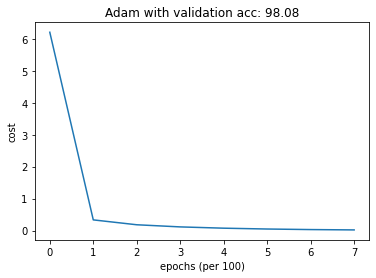

In [ ]:
# Draw cost

y_hat = predict(test_x, parameters)
y_hat = np.reshape(y_hat, 10000)
test_y = np.reshape(test_y, 10000)
# print(np.mean(y_hat, test_y))
print(f"The accuracy: {np.mean(y_hat == test_y)*100}%")
# plot the cost
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs (per 100)')
plt.title(f"Adam with validation acc: {np.mean(y_hat == test_y)*100}")
plt.show()

In [ ]:
get_parameters(path_cost)